In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data=pd.read_csv("cdata.csv")
data

,x,y,cluster
0,2.1364,0.8369,1
1,7.4096,-1.4137,3
2,5.0996,1.1552,0
3,7.8149,-1.0186,3
4,1.8925,1.2714,1
...,...,...,...
295,1.5798,1.9737,1
296,1.3918,2.5183,1
297,4.5359,0.4390,0
298,7.7911,0.3695,3


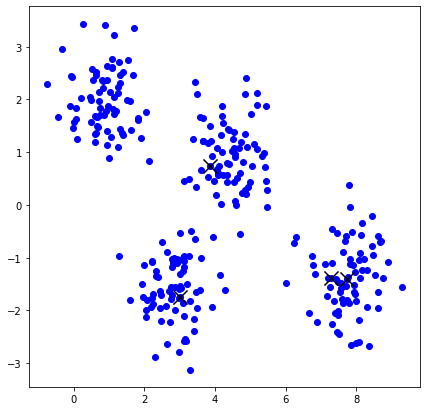

In [3]:
#(1)
#300個數據 總共有4個cluster
#先從各cluster 隨機設定一群集中心
#clus_random=pd.DataFrame(columns=["x","y","cluster"])
#for i in range(4):
    #clus_i=data[data.cluster.isin([i])].sample(1) #從每個cluster中隨機抽取一個點
    #clus_random=pd.concat([clus_random,clus_i],axis=0)  

#clus_0=clus_random.iloc[0,0:2].tolist()
#clus_1=clus_random.iloc[1,0:2].tolist()
#clus_2=clus_random.iloc[2,0:2].tolist()
#clus_3=clus_random.iloc[3,0:2].tolist()

#clus_random
#初始所有元素
x=data["x"].values
y=data["y"].values

#隨機選取4個群集中心
random=data.sample(n=4)
kx=random["x"].values
ky=random["y"].values

fig=plt.figure(figsize=(7,7))
fig=plt.scatter(x,y,color="b")
fig=plt.scatter(kx,ky,color="k",s=200,marker="x")
fig

In [4]:
#做出中心點的顏色
cValue=["r","y","g","b"]

In [5]:
##做出中心點的dictionaray

clus={i:[kx[i],ky[i]]
     for i in range(4)}
clus    

{0: [7.2876, -1.3818],
 1: [3.0119, -1.7457],
 2: [7.7261, -1.4052],
 3: [3.8553, 0.7281]}

In [6]:
#做出包含各項數據的dataframe
def assignment(data,clus):
    for i in clus.keys():
        data["dist_from_{}".format(i)]=(np.sqrt(((data["x"]-clus[i][0])**2)+(data["y"]-clus[i][1])**2))
    clus_dist=["dist_from_{}".format(i) for i in clus.keys()]
    data['closest']=data.loc[:,clus_dist].idxmin(axis=1)
    data['closest']=data['closest'].map(lambda x:int(x.lstrip("dist_from_")))
    data['color']=data["closest"].map(lambda x:cValue[x])
    return data
data=assignment(data,clus)

data
    

,x,y,cluster,dist_from_0,dist_from_1,dist_from_2,dist_from_3,closest,color
0,2.1364,0.8369,1,5.608698,2.726962,6.022604,1.722340,3,b
1,7.4096,-1.4137,3,0.126102,4.410214,0.316614,4.149742,0,r
2,5.0996,1.1552,0,3.350181,3.574033,3.667990,1.315560,3,b
3,7.8149,-1.0186,3,0.640281,4.857724,0.396667,4.327747,2,g
4,1.8925,1.2714,1,6.012202,3.218066,6.418339,2.036605,3,b
...,...,...,...,...,...,...,...,...,...
295,1.5798,1.9737,1,6.621054,3.985580,7.013841,2.594112,3,b
296,1.3918,2.5183,1,7.069034,4.561405,7.450987,3.045267,3,b
297,4.5359,0.4390,0,3.299571,2.663736,3.684895,0.739456,3,b
298,7.7911,0.3695,3,1.822241,5.226359,1.775890,3.952103,2,g


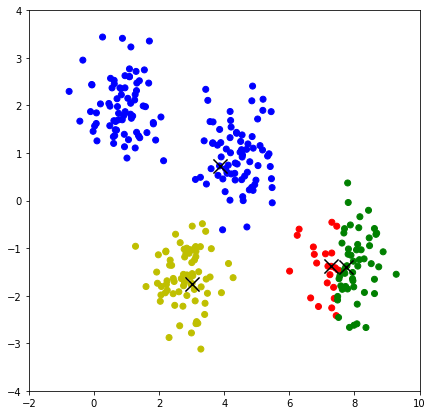

In [7]:
#定義四個cluster
fig2=plt.figure(figsize=(7,7))
fig2=plt.scatter(data["x"],data["y"],color=data["color"])
plt.xlim(-2,10)
plt.ylim(-4,4)
fig2=plt.scatter(kx,ky,color="k",s=200,marker="x")
fig2

In [8]:
#定義新cluster的平均
def new(k):
    for i in clus.keys():
        clus[i][0]=np.mean(data[data["closest"]==i]['x'])
        clus[i][1]=np.mean(data[data["closest"]==i]["y"])
    return k
clus=new(clus)
print(clus)

{0: [7.039913636363636, -1.4187590909090908], 1: [2.815691891891892, -1.5974837837837834], 2: [8.04997358490566, -1.3543490566037735], 3: [2.6520423841059593, 1.4523768211920536]}


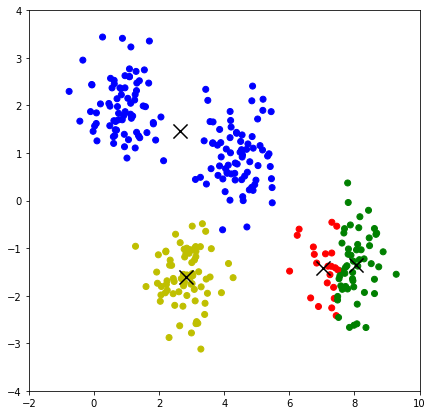

In [9]:
#將新的中心點畫上
fig3=plt.figure(figsize=(7,7))
fig3=plt.scatter(data["x"],data["y"],color=data["color"])
plt.xlim(-2,10)
plt.ylim(-4,4)
for i in range(len(clus)):
    fig3=plt.scatter(clus[i][0],clus[i][1],color="k",s=200,marker="x")
fig3

          x       y  cluster  dist_from_0  dist_from_1  dist_from_2  \
0    2.1364  0.8369        1     2.285456     2.518892     6.036445   
1    7.4096 -1.4137        3     3.811704     4.581969     0.346460   
2    5.0996  1.1552        0     0.710872     3.557066     3.665680   
3    7.8149 -1.0186        3     3.925048     5.016100     0.359886   
4    1.8925  1.2714        1     2.546963     3.005981     6.430216   
..      ...     ...      ...          ...          ...          ...   
295  1.5798  1.9737        1     3.018271     3.771602     7.022744   
296  1.3918  2.5183        1     3.409510     4.347730     7.457730   
297  4.5359  0.4390        0     0.523926     2.646017     3.693019   
298  7.7911  0.3695        3     3.421588     5.331241     1.743144   
299  2.7497 -1.7915        2     3.209541     0.222433     5.021439   

     dist_from_3  closest color  
0       1.709431        3     b  
1       7.370957        2     g  
2       4.312009        0     r  
3       7.5

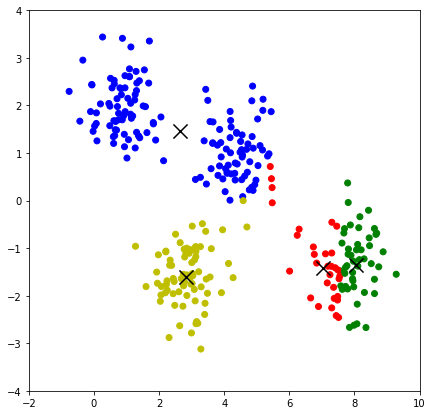

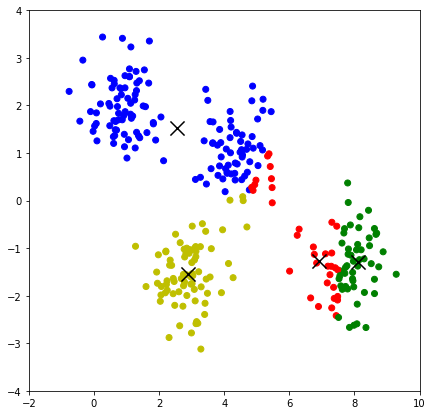

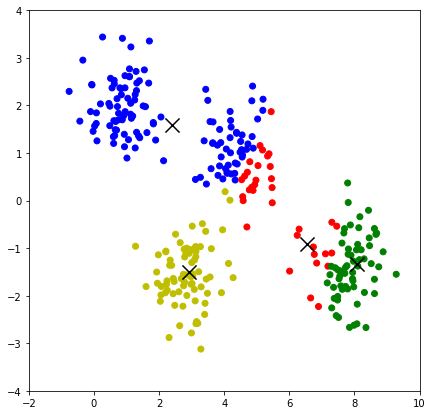

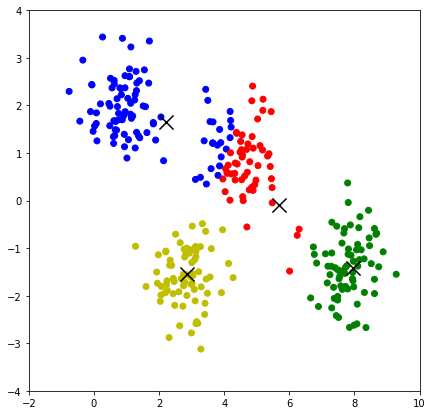

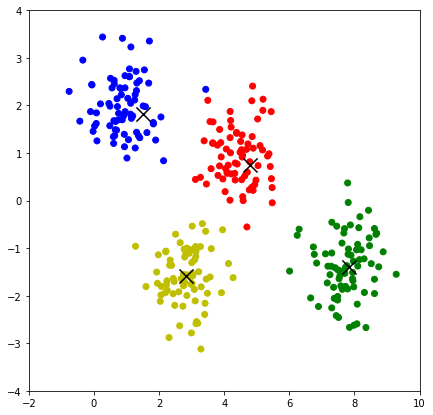

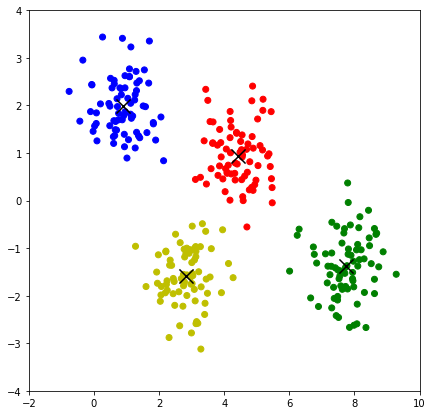

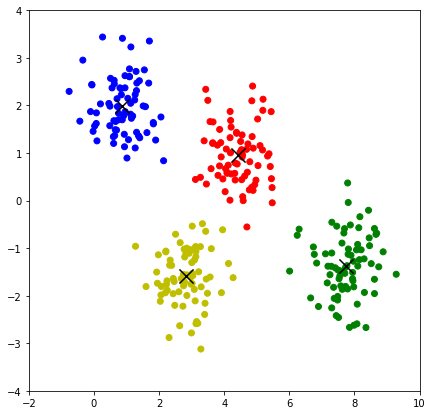

In [10]:
while True:
    end_cluster=data["closest"]
    clus=new(clus)
    data=assignment(data,clus)
    
    fig=plt.figure(figsize=(7,7))
    fig=plt.scatter(data["x"],data["y"],color=data["color"])
    plt.xlim(-2,10)
    plt.ylim(-4,4)
    for i in range(len(clus)):
        fig=plt.scatter(clus[i][0],clus[i][1],color="k",s=200,marker="x")
    fig
    if end_cluster.equals(data["closest"]):
        print(data)
        break
    
   
    

In [11]:
#(2)
#def SSE_func(k):
    #for j in range(k+1):
        #random=data.sample(n=j)
        #clus={i:[kx[i],ky[i]]
             #for i in range(j)}
        #print(j)
    #return random
m=2
SSE_list=[]

while m<51:
    
    x=data["x"].values
    y=data["y"].values
    random=data.sample(n=m)
    kx=random["x"].values
    ky=random["y"].values

#cValue=["r","y","g","b"]

    clus={i:[kx[i],ky[i]]
     for i in range(m)}

    def assignment(data,clus):
        for i in clus.keys():
            data["dist_from_{}".format(i)]=(np.sqrt(((data["x"]-clus[i][0])**2)+(data["y"]-clus[i][1])**2))
        clus_dist=["dist_from_{}".format(i) for i in clus.keys()]
        data['closest']=data.loc[:,clus_dist].idxmin(axis=1)
        data['closest']=data['closest'].map(lambda x:int(x.lstrip("dist_from_")))
    #data['color']=data["closest"].map(lambda x:cValue[x])
        return data
    data=assignment(data,clus)

    def new(k):
        for i in clus.keys():
            clus[i][0]=np.mean(data[data["closest"]==i]['x'])
            clus[i][1]=np.mean(data[data["closest"]==i]["y"])
        return k
    clus=new(clus)

    while True:
        end_cluster=data["closest"]
        clus=new(clus)
        data=assignment(data,clus)
        if end_cluster.equals(data["closest"]):
            #print(data)
            #print(clus)
            break
    
    SSE=0      
    for i in range(len(data)):
        n=data["closest"][i]
        SSE+=data["dist_from_{}".format(n)][i]
    SSE_list.append(SSE)
    #print(SSE)
    m=m+1
print(SSE_list)
#print(SSE_list)

[543.8790425481429, 355.1018462768939, 222.89434544344434, 212.46809854815092, 201.0881648525011, 198.93030212319908, 190.93130585400945, 166.98495215128807, 171.92209785334228, 166.7218326944927, 161.99986898070705, 151.71138957230485, 148.6420710986912, 133.70044115941462, 133.89664163666484, 132.98038461434615, 123.24168368262612, 117.94979654345003, 121.20386603901656, 119.6946407674461, 112.15953201730525, 109.02027409897012, 102.81541853889031, 104.06996842522877, 109.35514572559592, 106.85676127174857, 104.44235873673819, 101.26089865420411, 91.36613422554, 98.31802986258346, 89.86899446490735, 90.94694980450686, 83.85341625026362, 95.29020301384706, 82.90078434432877, 82.63514829766632, 81.59591684705809, 79.21732217033204, 82.69407929488506, 82.9732534230675, 75.39743940296108, 78.17878828641948, 73.46841087043416, 80.71357132369099, 72.78572316227086, 71.70671364773142, 74.23491427077161, 69.96656921845533, 69.10745540762211]


Text(0, 0.5, 'Sum of Square error')

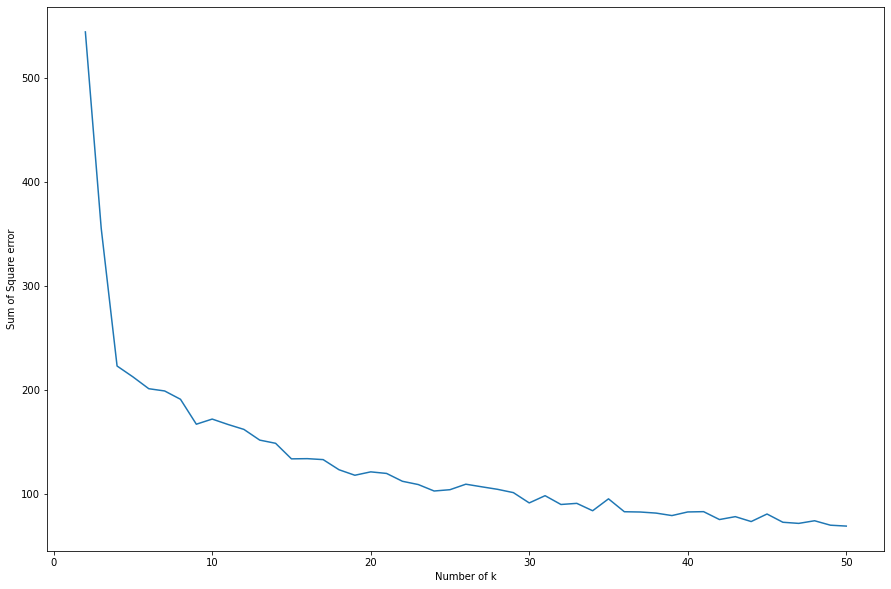

In [12]:
plt.figure(figsize=(15,10))
x=list(range(2,51))
y=SSE_list

plt.plot(x,y)
plt.xlabel("Number of k")
plt.ylabel("Sum of Square error")

In [13]:
#(3)
k=1
SSE_list=[]

while k<11:
    data=data.iloc[np.random.permutation(data.index)].reset_index(drop=True)
    x=data["x"].values
    y=data["y"].values
    random=data.sample(n=4)
    kx=random["x"].values
    ky=random["y"].values

    clus={i:[kx[i],ky[i]]
     for i in range(4)}

    def assignment(data,clus):
        for i in clus.keys():
            data["dist_from_{}".format(i)]=(np.sqrt(((data["x"]-clus[i][0])**2)+(data["y"]-clus[i][1])**2))
        clus_dist=["dist_from_{}".format(i) for i in clus.keys()]
        data['closest']=data.loc[:,clus_dist].idxmin(axis=1)
        data['closest']=data['closest'].map(lambda x:int(x.lstrip("dist_from_")))
    #data['color']=data["closest"].map(lambda x:cValue[x])
        return data
    data=assignment(data,clus)

    def new(k):
        for i in clus.keys():
            clus[i][0]=np.mean(data[data["closest"]==i]['x'])
            clus[i][1]=np.mean(data[data["closest"]==i]["y"])
        return k
    clus=new(clus)

    while True:
        end_cluster=data["closest"]
        clus=new(clus)
        data=assignment(data,clus)
        if end_cluster.equals(data["closest"]):
            #print(data)
            #print(clus)
            break
    
    SSE=0      
    for i in range(len(data)):
        n=data["closest"][i]
        SSE+=data["dist_from_{}".format(n)][i]
    SSE_list.append(SSE)
    #print(SSE)
    k=k+1
print(SSE_list)

[222.89434544344437, 341.24963295965523, 222.8943454434444, 222.89434544344445, 341.24963295965546, 345.57667965484876, 222.89434544344428, 222.89434544344437, 222.89434544344428, 222.89434544344434]


Text(0, 0.5, 'Sum of Square error')

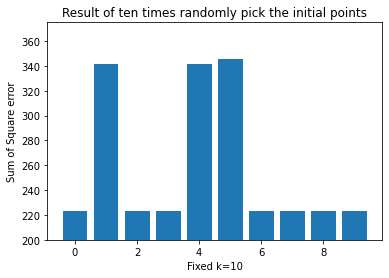

In [14]:
x=list(range(0,10))
y=SSE_list


plt.bar(x,y)
plt.ylim(200,375)
plt.title("Result of ten times randomly pick the initial points")
plt.xlabel("Fixed k=10")
plt.ylabel("Sum of Square error")

##隨機抽樣的數據差異並不大 猜測是dataframe sample數據沒有打散